# Esercizi di Analisi Numerica I, seconda scheda

In [3]:
import numpy as np

import matplotlib.pyplot as plt

## Esercizio 1

In [2]:
def chess_mat(size: (int, int)):
    """
    Returns a "chess" like matrix made of 0s and 1s. 
    """
    A = np.ones(size)
    A[::2, 1::2] = 0
    A[1::2, ::2] = 0
    return A

chess_mat((4, 4))

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [3]:
def mult_mat(size: (int, int)):
    """
    Returns a arange reshaped to a matrix containing integer entries from 1 to rows*columns ordered by rows.
    """
    (r, c) = size
    return np.arange(1, r*c+1).reshape(size)

mult_mat((5, 6))

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [5]:
def diag_anti_square(size: int):
    """
    Returns a square matrix with ranged value from 1 to size in both the diagonal and anti-diagonal of the matrix.  
    """
    D = np.zeros((size, size))
    L = np.arange(size) # Vector to place in the diagonal/anti-diagonal
    D[L, L] = L + 1 # Diagonal
    D[L, -(L+1)] = L + 1 # Antidiagonal 
    return D

diag_anti_square(10)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  0.,  0.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  0.,  0.,  0.,  0.,  8.,  0.,  0.],
       [ 0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.],
       [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]])

## Esercizio 2

Scrivere le seguenti funzioni (vietato l'uso dei for):

- funzione che restituisce l'elemento di un array 1D più vicino ad un dato scalare
- funzione che inserisce 3 zeri consecutivi tra gli elementi di un array 1D
- funzione che scambia due righe in un array 2D

In [ ]:
def nearest_index(arr: np.array, val: float): 
    """
    Returns the index of the "nearest" element of arr to val. 
    """
    tmp = np.abs(arr - val)
    return tmp.argmin()

nearest_index(np.array([1, 2, 3, 4, 5]), 4.1)

3

In [15]:
def insert3zero(arr: np.array):
    """
    Inserts three zero after every each element of a 1D array. 
    """
    arr = np.reshape(arr, (arr.shape[0], 1)) 
    arr = np.concatenate((arr, np.zeros(( 3, arr.shape[0])) ), axis=1) #need not att a new dimension because I resized the tensor
    arr = np.ravel(arr)
    return arr


def insert3zero1(arr: np.array):
    tmp = np.zeros(len(arr)*4)
    tmp[::4] = arr
    return tmp

insert3zero1(np.array([1, 2, 3]))

array([1., 0., 0., 0., 2., 0., 0., 0., 3., 0., 0., 0.])

In [7]:
def swap_rows(M: np.array, k: int, l: int):
    """
    Swap k and l roes of the M 2D matrix. 
    """
    M[[k, l], :] = M[[l, k], :]
    return M

swap_rows(np.array([[1, 1], [2, 2]]), 0, 1)

array([[2, 2],
       [1, 1]])

## Esercizio 3
Scrivere 2 funzioni, una usando le liste e una usando numpy, che prende in input una lista (array 1D rispettivamente) di lunghezza $N$ e calcola la lista (array) contenente i punti medi, cioè 
$$ y_i =  \frac{x_i + x_{i+1}}{2} \qquad \forall\, i < N$$
Nella funzione che usa numpy è vietato l'uso dei for.
Confrontare le performance con `%timeit`. Qual'è meglio? Di quanto?

In [18]:
def vec_avg(xs: np.array):
    """
    Computes the avarage of every two consecutive points in a 1D vector. 
    The last element of the returned vector is the average of the last and first element. 
    """
    slc = (np.arange(0, xs.shape[0]) + 1) % xs.shape[0] #slice to shift vector 1 element
    ys = np.array([xs[:], xs[ slc ]])
    return np.sum(ys, axis=0) / 2

def vec_avg1(xs: np.array):
    """
    Alternative `vec_avg` that relies on np.roll instead of slices. 
    """
    return np.sum([xs[:], np.roll(xs[:], 1)], axis=0) / 2

def vec_avg2(xs: np.array):
    slc = (np.arange(0, xs.shape[0]) + 1) % xs.shape[0] #slice to shift vector 1 element
    return (xs + xs[slc]) / 2

def for_avg(xs: list):
    """
    Imperative version of `vec_avg`. 
    """
    ys = []; ln = len(xs)
    for i in range(ln):
        ys.append( (xs[i] + xs[(i+1) % ln]) / 2 )
    return ys

arr = np.arange(10)
print(vec_avg(arr), vec_avg2(arr))

[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 4.5] [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 4.5]


In [9]:
xs = range(amount)
%timeit for_avg(xs)

360 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


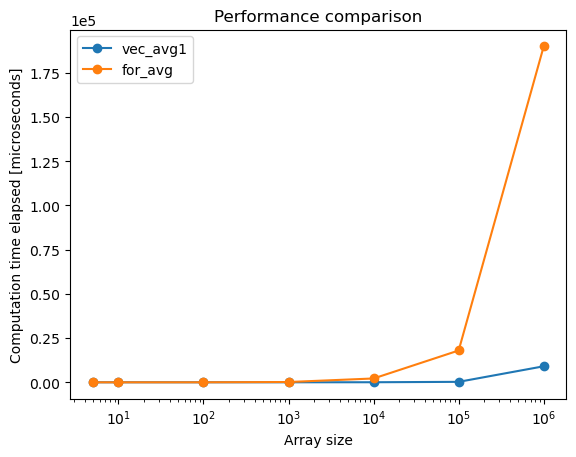

In [10]:
# Here we collect computation time calculated by the %timeit feature in Jupyter notebook in function of array's length. 
# We then plot it using Matplotlib in a scatter/line plot. 

results = np.array([
    [5,       18.1, 0.75 ],
    [10,      18.1, 1.62 ],
    [100,     21.4, 13.8 ],
    [1000,    21.8, 172  ],
    [10000,   45,   2180 ],
    [100000,  270,  18000], 
    [1000000, 9070, 190000]
]).transpose()

plt.title("Performance comparison")
plt.plot(results[0], results[1], '-o', label="vec_avg1")
plt.plot(results[0], results[2], '-o', label="for_avg")
#plt.yscale('log'); 
plt.xscale('log');
plt.xlabel('Array size')
plt.ylabel('Computation time elapsed [microseconds]')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend()
plt.show()

As expected, Numpy is way faster at computations over vectors. Here I show the divergence between computation times of the two different methods. 

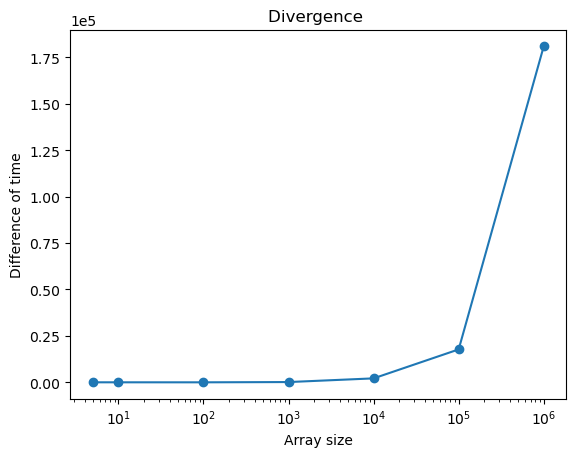

In [11]:
diverg = [ results[0], abs(results[1]- results[2])]

plt.title("Divergence ")
plt.plot(diverg[0], diverg[1], '-o')
#plt.yscale('log'); 
plt.xscale('log');
plt.xlabel('Array size')
plt.ylabel('Difference of time')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.show()

## Esercizio 4

Scrivere una funzione, senza l'uso dei cicli for, che dati dei punti materiali $\pmb{x}^i = (x_1^i, x_2^i, x_3^i) \in \mathbb{R}^3$ di massa $m^i$, calcoli il centro di massa, cioè,
$$
\bar{\pmb{x}} := \frac{1}{M}\sum_{i=0}^N m^i\pmb{x}^i \qquad\text{con } M := \sum_{i=0}^N m^i.
$$

In [ ]:
def mass_center(pts: np.array, masses: np.array):
    """
    Returns the mass center of N "weighted" vectors. 
    pts is the matrix of vectors, while masses is the vector of masses. 
    The number of columns must be the same as the number of masses. 
    """

    assert pts.shape[1] == masses.shape[0], "pts' #columns != masses' length"
    M = np.sum(masses)
    #print(pts * masses)
    return np.sum( pts * masses, axis=1 ) / M

pts = np.array([ [0, 0, 0], [1 ,2, 1], [2, 2, 1], [0, 1, 1] ]).transpose()
masses = np.array([4, 5, 1, 2])

mass_center(pts, masses)

[[ 0  5  2  0]
 [ 0 10  2  2]
 [ 0  5  1  2]]


array([0.58333333, 1.16666667, 0.66666667])